In [1]:
import numpy as np
x = np.array([1,2,3])

In [2]:
x.__class__#클래스 이름 표시

numpy.ndarray

In [3]:
x.shape

(3,)

In [4]:
x.ndim

1

In [5]:
W = np.array([[1,2,3],[4,5,6]])

In [6]:
W.shape

(2, 3)

In [7]:
W.ndim

2

In [8]:
W

array([[1, 2, 3],
       [4, 5, 6]])

In [9]:
X = [[0,1,2],[3,4,5]]

In [12]:
X

[[0, 1, 2], [3, 4, 5]]

In [10]:
W+X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [11]:
W*X

array([[ 0,  2,  6],
       [12, 20, 30]])

In [13]:
A = np.array([[1,2],[3,4]])

In [14]:
A*10

array([[10, 20],
       [30, 40]])

In [15]:
A = np.array([[1,2],[3,4]])

In [16]:
b = np.array([10,20])

In [17]:
A*b

array([[10, 40],
       [30, 80]])

In [18]:
a = np.array([1,2,3])

In [19]:
b = np.array([4,5,6])

In [20]:
np.dot(a,b)

32

In [22]:
#행렬의 내적
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.matmul(A,B)

array([[19, 22],
       [43, 50]])

In [23]:
A*B

array([[ 5, 12],
       [21, 32]])

In [25]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [26]:
#완전 연결계층에 의한 변환의 미니배치 버전(선형 변환)
import numpy as np
W1 = np.random.randn(2,4)#가중치 2x4
b1 = np.random.randn(4)#편향 1x4
x = np.random.randn(10,2)#입력 10x2
h = np.matmul(x,W1)+b1

In [27]:
#S모양 곡선(비선형 변환)
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [29]:
#시그모이드를 사용하여 은닉층 뉴런을 변환(비선형 변환)
a= sigmoid(h)

In [30]:
#신경망 추론 전체 그림
import numpy as np

def sigmoid(x):#시그모이드
    return 1/(1+np.exp(-x))

x = np.random.randn(10,2)#10x2입력층: 2차원 데이터 10개가 미니배치로 처리됨
W1 = np.random.randn(2,4)#2x4 가중치
b1 = np.random.randn(4)#1x4 편향
W2 = np.random.randn(4,3)#4x3 가중치
b2 = np.random.randn(3)

h = np.matmul(x,W1)+b1#10x4 은닉층
a = sigmoid(h)#10x4 완전 연결 계층
s = np.matmul(a,W2)+b2#10x3 최종 출력(3 클래스 분류)

In [31]:
class Sigmoid:#시그모이드 함수를 클래스로 구현
    def __init__(self):
        self.params = []#학습하는 매개변수 없음
    
    def forward(self, x):
        return 1/(1+np.exp(-x))

In [32]:
class Affine:#완전 연결 계층 클래스로 구현
    def __init__(self,W,b):#초기화
        self.params = [W,b]#가중치와 편향
    
    def forward(self,x):#순전차 처리 구현
        W,b = self.params
        out = np.matmul(x,W)+b
        return out

In [85]:
#Two Layer Net 구현
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):#가중치 초기화
        I, H, O = input_size,hidden_size, output_size#3개의 계층 생성
        
        #가중치와 편향 초기화
        W1 = np.random.randn(I,H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H,O)
        b2 = np.random.randn(O)
        
        #계층 생성
        self.layers = [
            Affine(W1,b1),
            Sigmoid(),
            Affine(W2,b2)
        ]
        
        #모든 가중치를 리스트에 모은다
        self.params = []
        for layer in self.layers:
            self.params += layer.params
    
    def predict(self, x):#추론 처리
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [42]:
#리스트 결합
a = ['A','B']
a+= ['C','D']

In [43]:
a

['A', 'B', 'C', 'D']

In [44]:
x = np.random.randn(10,2)
model = TwoLayerNet(2,4,3)#input_size, hidden_size, output_size
s = model.predict(x)
s#입력 데이터 x에 대한 점수(ㄴ)

array([[ 0.48988136, -1.98812148,  3.00120095],
       [ 0.6765205 , -1.06528948,  4.19082399],
       [ 0.72285721, -0.98341831,  4.34754096],
       [ 0.82685718, -0.89374449,  4.40530989],
       [ 0.66449036, -1.08483364,  4.0748879 ],
       [ 1.01580743, -0.85571633,  3.90414502],
       [ 0.5097578 , -1.91111883,  3.33262692],
       [ 0.87903668, -1.35777454,  3.81872853],
       [ 1.0263118 , -0.68828592,  3.96687848],
       [ 0.28436914, -2.19822323,  2.45952867]])

### 소프트맥스 함수
$$y_k \frac{exp(s_k)}{ \sum_{i=1}^n exp(s_i)}$$
<b>출력이 총 $n$개일 때, $k$번째의 출력 $y_k$를 구하는 계산식</b><br>
<b>$y_k$: $k$번째 클래스에 해당하는 소프트맥스 함수의 출력</b>

<br><br>
### 교차 엔트로피 오차의 수식
$$L = -\sum_k t_klogy_k$$
정답 레이블은 $t = [0,0,1]$과 같이 원핫 벡터로 표기

<br><br>

### 미니 배치 처리를 고려한 오차의 식
$$L = -\frac{1}{N}\sum_n\sum_k t_{nk}logy_{nk}$$
:평균 손실 함수<br><br>
데이터 개수:N개, $t_{nk}$: n번째 데이터의 k차원째의 값, $y_{nk}$: 신경망의 출력, $t_{nk}$: 정답 레이블

In [47]:
#Repeat 노드
D, N = 8,7

#입력
x = np.random.randn(1,D)

#순전파
y = np.repeat(x,N,axis = 0)#원소 복제 수행

#무작위 기울기
dy = np.random.randn(N,D)

#역전파
dx = np.sum(dy, axis = 0,#총합
           keepdims=True)#2차원 배열 차원 수 유지

In [48]:
dx

array([[ 5.39809163, -6.50412858,  1.57210402, -1.85534185, -2.12816353,
        -1.98131893,  3.16830447,  2.32178235]])

In [49]:
dy

array([[ 0.56952598, -1.22725653, -1.24556488,  0.13704173,  1.21360177,
        -1.96168425,  0.82642681,  1.23160423],
       [ 1.63526847, -1.54056466,  0.62169324, -0.09625278, -0.73294248,
         0.7018978 ,  1.14968002, -1.20519641],
       [ 0.90876329,  0.04510618, -1.38657889,  0.94230008, -1.37633776,
        -0.61148481, -0.33193171,  0.36360305],
       [-0.33741463, -0.6803668 ,  0.72781723, -0.25635209,  1.21623509,
        -2.07378438,  0.53632318,  1.24198267],
       [ 0.48747785, -1.54608446,  2.02442711, -1.69605654, -1.58236084,
         1.13409802, -0.1153853 ,  1.62164953],
       [ 1.8302467 ,  0.50031148,  0.19776204, -1.45555192, -0.70033747,
         0.04710648, -0.39054761, -1.37232149],
       [ 0.30422399, -2.05527379,  0.63254817,  0.56952967, -0.16602184,
         0.78253221,  1.49373908,  0.44046077]])

In [50]:
#Sum 노드
D, N = 8,7
x = np.random.randn(N,D)#입력
y = np.sum(x, axis = 0, keepdims = True)#순전파

dy = np.random.randn(1,D)#무작위 기울기
dx = np.repeat(dy,N,axis = 0)#역전파

In [51]:
dx

array([[ 0.43522136,  0.67376403,  0.92372544, -0.35259034,  1.2982977 ,
         1.89175537, -0.79820426,  0.67320607],
       [ 0.43522136,  0.67376403,  0.92372544, -0.35259034,  1.2982977 ,
         1.89175537, -0.79820426,  0.67320607],
       [ 0.43522136,  0.67376403,  0.92372544, -0.35259034,  1.2982977 ,
         1.89175537, -0.79820426,  0.67320607],
       [ 0.43522136,  0.67376403,  0.92372544, -0.35259034,  1.2982977 ,
         1.89175537, -0.79820426,  0.67320607],
       [ 0.43522136,  0.67376403,  0.92372544, -0.35259034,  1.2982977 ,
         1.89175537, -0.79820426,  0.67320607],
       [ 0.43522136,  0.67376403,  0.92372544, -0.35259034,  1.2982977 ,
         1.89175537, -0.79820426,  0.67320607],
       [ 0.43522136,  0.67376403,  0.92372544, -0.35259034,  1.2982977 ,
         1.89175537, -0.79820426,  0.67320607]])

In [52]:
dx.shape

(7, 8)

In [53]:
class MatMul:
    def __init__(self,W):
        self.params = [W]#매개변수 보관
        self.grads = [np.zeros_like(W)]#기울기 보관
        self.x = None
    
    def forward(self,x):#순전파
        W, = self.params
        out = np.matmul(x,W)
        self.x = x
        return out#x.W
    
    def backward(self, dout):#역전파
        W, = self.params
        dx = np.matmul(dout, W.T)#doutxW^T
        dW = np.matmul(self.x.T,dout)        
        self.grads[0][...] = dW#깊은 복사
        return dx

In [55]:
a = np.array([1,2,3])
b = np.array([4,5,6])

a = b#얕은 복사
a[...] = b#깊은 복사

In [88]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [137]:
class Sigmoid:#Sigmoid 계층 구현
    def __init__(self):
        #print('S_init')
        self.params, self.grads = [],[]#초기화(학습되는 매개변수 x)
        self.out = None
    
    def forward(self, x):#순전파
        #print('Sigmoid Forward')
        out = 1/(1+np.exp(-x))#시그모이드 함수
        self.out = out
        return out
    
    def backward(self, dout):#역전파
        #print('Sigmoid Backward')
        dx = dout*(1.0 - self.out)*self.out
        return dx

In [136]:
class Affine:#Affine계층 구현
    def __init__(self,W,b):
        #print('A_init')
        self.params = [W,b]#가중치, 편향
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
    
    def forward(self,x):#순전파
        #print('Affine Forward')
        W, b= self.params
        out = np.matmul(x,W)+b#x*W+b
        self.x = x
        return out
    
    def backward(self, dout):#역전파
        #print('Affine Backward')
        W,b = self.params
        dx = np.matmul(dout,W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis = 0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

Softmax with Loss 계층 생략

In [118]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx


In [129]:
class SGD:#확률적 경사 하강법
    def __init__(self, lr = 0.01):
        self.lr = lr#학습률
    
    def update(self, params, grads):#갱신
        for i in range(len(params)):
            params[i] -= self.lr *grads[i]
        

#### 간단한 데이터셋으로 신경망 학습

In [130]:
#스파이럴 데이터셋
import sys
# coding: utf-8
import numpy as np


def load_data(seed=1984):
    np.random.seed(seed)
    N = 100  # 클래스당 샘플 수
    DIM = 2  # 데어터 요소 수
    CLS_NUM = 3  # 클래스 수

    x = np.zeros((N*CLS_NUM, DIM))
    t = np.zeros((N*CLS_NUM, CLS_NUM), dtype=np.int)

    for j in range(CLS_NUM):
        for i in range(N): # N*j, N*(j+1)):
            rate = i / N
            radius = 1.0*rate
            theta = j*4.0 + 4.0*rate + np.random.randn()*0.2

            ix = N*j + i
            x[ix] = np.array([radius*np.sin(theta),
                              radius*np.cos(theta)]).flatten()
            t[ix, j] = 1

    return x, t

import matplotlib.pyplot as plt
x,t = load_data()
print('x',x.shape)
print('t',t.shape)

x (300, 2)
t (300, 3)


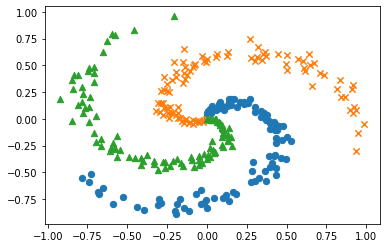

In [131]:
#데이터셋 보기

# 데이터점 플롯
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

- 분류할 클래스 수 3개
- 입력: 2차원 데이터
- 직선만으로 클래스들을 분류할 수 없음

In [132]:
#필요한 functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.maximum(0, x)


def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 정답 데이터가 원핫 벡터일 경우 정답 레이블 인덱스로 변환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [133]:
#신경망 구현
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size#입력층 뉴런수, 은닉층 뉴런수, 출력층 뉴런수
        
        #가중치와 편향 초기화
        W1 = 0.01*np.random.randn(I,H)
        b1 = np.zeros(H)
        W2 = 0.01*np.random.randn(H,O)
        b2 = np.zeros(O)
        
        #계층 생성
        self.layers = [
            Affine(W1,b1),#1st layer
            Sigmoid(),
            Affine(W2,b2)#2nd layer
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        #모든 가중치와 기울기를 리스트에 모은다
        self.params, self.grads = [],[]
        for layer in self.layers:
            print('layer:',layer)
            self.params += layer.params
            self.grads += layer.grads
    
    def predict(self,x):#추론
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):#순전파
        score = self.predict(x)
        loss = self.loss_layer.forward(score,t)
        return loss

    def backward(self, dout = 1):#역전파
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [138]:
#힉습용 코드

#하이퍼파라미터 설정
max_epoch = 300#에폭수
batch_size = 30#미니배치 크기
hidden_size = 10#은닉층 뉴런수
learning_rate =1.0#학습률

#데이터 읽기, 모델과 옵티마이저 생서
x,t = load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

#학습에 사용하는 변수
data_size = len(x)
max_iters = data_size//batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    #데이터 뒤섞기
    idx =np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        #기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count +=1
        
        #정기적으로 학습 경과 출력
        if (iters+1)%10 ==0:
            avg_loss = total_loss/loss_count
            print('| 에폭 %d | 반복 %d / %d | 손실 %.2f'%(epoch+1, iters+1, max_iters
                                            , avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0,0

layer: <__main__.Affine object at 0x0000021C7DA95FD0>
layer: <__main__.Sigmoid object at 0x0000021C7DAADDF0>
layer: <__main__.Affine object at 0x0000021C7F730E80>
| 에폭 1 | 반복 10 / 10 | 손실 1.13
| 에폭 2 | 반복 10 / 10 | 손실 1.13
| 에폭 3 | 반복 10 / 10 | 손실 1.12
| 에폭 4 | 반복 10 / 10 | 손실 1.12
| 에폭 5 | 반복 10 / 10 | 손실 1.11
| 에폭 6 | 반복 10 / 10 | 손실 1.14
| 에폭 7 | 반복 10 / 10 | 손실 1.16
| 에폭 8 | 반복 10 / 10 | 손실 1.11
| 에폭 9 | 반복 10 / 10 | 손실 1.12
| 에폭 10 | 반복 10 / 10 | 손실 1.13
| 에폭 11 | 반복 10 / 10 | 손실 1.12
| 에폭 12 | 반복 10 / 10 | 손실 1.11
| 에폭 13 | 반복 10 / 10 | 손실 1.09
| 에폭 14 | 반복 10 / 10 | 손실 1.08
| 에폭 15 | 반복 10 / 10 | 손실 1.04
| 에폭 16 | 반복 10 / 10 | 손실 1.03
| 에폭 17 | 반복 10 / 10 | 손실 0.96
| 에폭 18 | 반복 10 / 10 | 손실 0.92
| 에폭 19 | 반복 10 / 10 | 손실 0.92
| 에폭 20 | 반복 10 / 10 | 손실 0.87
| 에폭 21 | 반복 10 / 10 | 손실 0.85
| 에폭 22 | 반복 10 / 10 | 손실 0.82
| 에폭 23 | 반복 10 / 10 | 손실 0.79
| 에폭 24 | 반복 10 / 10 | 손실 0.78
| 에폭 25 | 반복 10 / 10 | 손실 0.82
| 에폭 26 | 반복 10 / 10 | 손실 0.78
| 에폭 27 | 반복 10 / 10 | 손실 0.76
| 에폭 28 |

In [135]:
#데이터 뒤섞기
np.random.permutation(10)

array([5, 1, 8, 4, 9, 7, 0, 2, 6, 3])

In [128]:
np.random.permutation(10)

array([7, 9, 8, 1, 2, 3, 4, 5, 0, 6])

C:\Anaconda3\envs\dsfs\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\dsfs\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\dsfs\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\dsfs\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\dsfs\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\envs\dsfs\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48373 missing from current font.
 

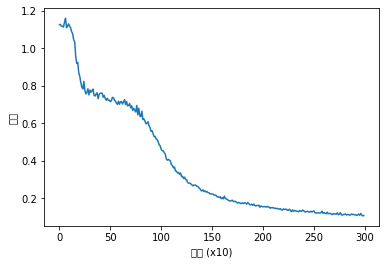

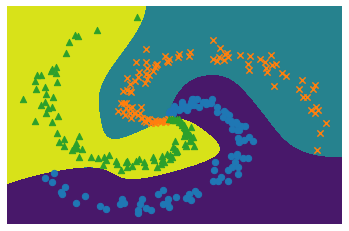

In [140]:
#train_cistom_loop
#터미널에 출력되는 손실 값이 순조롭게 낮아짐
# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

학습된 신경망은 '나선형'패턴을 올바르게 파악했음

layer: <__main__.Affine object at 0x0000021C464028B0>
layer: <__main__.Sigmoid object at 0x0000021C464007C0>
layer: <__main__.Affine object at 0x0000021C463C5790>
| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 

| 에폭 202 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 203 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 204 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 205 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 206 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 207 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 208 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 209 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 210 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 211 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 212 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 213 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 214 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 215 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 216 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 217 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 218 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 219 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 220 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 221 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 222 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 223 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 224 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 225 |  반복 1 / 10 | 시간 0[s] | 

C:\Anaconda3\envs\dsfs\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\dsfs\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\dsfs\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\dsfs\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\dsfs\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\envs\dsfs\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48373 missing from current font.
 

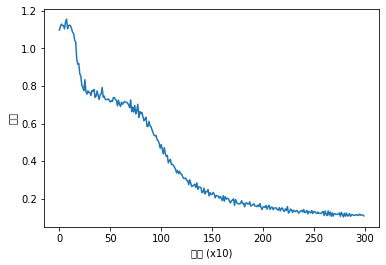

In [144]:
#Trainer 클래스를 사용해 학습을 수행하는 코드
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral

max_epoch =300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x,t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr = learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x,t,max_epoch, batch_size, eval_interval=10)
trainer.plot()

#### 계산 고속도
- 비트 정밀도
- GPU

In [145]:
#비트 정밀도
a = np.random.randn(3)
a

array([-0.62770321,  1.0043732 , -0.98858318])

In [148]:
#64비트 부동소수점이 사용되는지 확인
a.dtype

dtype('float64')

In [149]:
#32비트 부동소수점 수를 우선으로 사용(더 빠르고 메모리 관점에서 효율적)
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [150]:
c =  np.random.randn(3).astype('f')
c.dtype

dtype('float32')

In [ ]:
#GPU(쿠파이)
!pip install cupy
import cupy as cp